# Linear Regression for House Prices
Linear regression assumes a straight-line relationship between inputs (features) and a continuous output. We predict house prices from **area**, **bedrooms**, and **location**. To judge how well the model generalises, we use **K-Fold Cross-Validation**, which repeatedly trains the model on different data splits and averages the scores. This reduces the risk of overfitting to a single train/test split.


🔹 Fold 1/5
Fold 1: MSE = 6865977899586.52, R² = 93.27%

🔹 Fold 2/5
Fold 2: MSE = 6927128790671.55, R² = 92.19%

🔹 Fold 3/5
Fold 3: MSE = 6860740394821.20, R² = 93.22%

🔹 Fold 4/5
Fold 4: MSE = 6691901294965.50, R² = 93.68%

🔹 Fold 5/5
Fold 5: MSE = 7946409983148.07, R² = 92.08%

✅ Average MSE across 5 folds: 7058431672638.567
✅ Average R² Score across 5 folds: 92.89%

Trained Parameters (from last fold):
m1 (Area slope): 7692004.3415
m2 (Bedrooms slope): 268452.6213
m3 (Location slope): 5485263.3924
c (Intercept): 17877856.9435


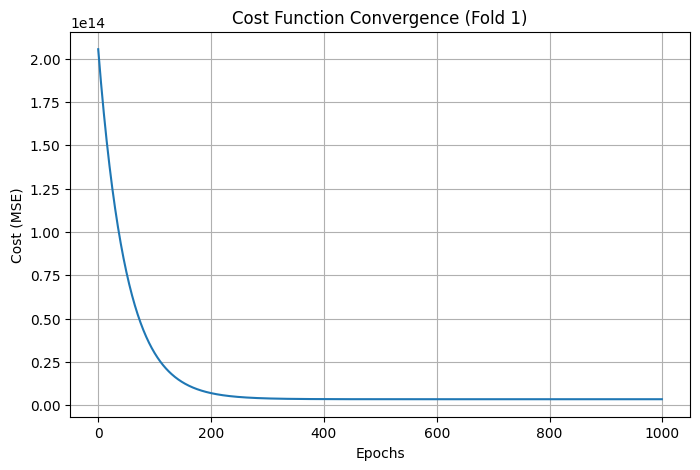

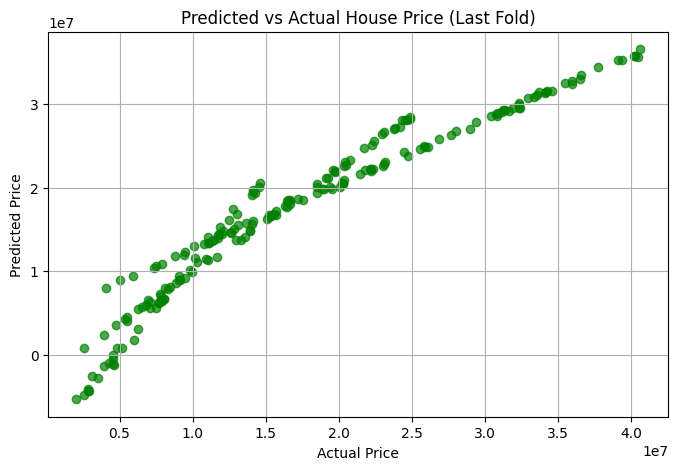

In [6]:
# ============================================================
# Linear Regression from Scratch (No Theta)
# Predict House Prices using Area, Bedrooms, and Location
# With 5-Fold Cross Validation and R² Score
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# ------------------------------------------------------------
# 1️⃣ Load and preprocess dataset
# ------------------------------------------------------------
file_path = "./datasets/House_Price_Dataset_11.csv"
df = pd.read_csv(file_path)

# Remove missing values
df = df.dropna()

# Select relevant features
X1 = df["Area"].values.astype(float)
X2 = df["Bedrooms"].values.astype(float)
X3 = df["Location"].astype("category").cat.codes.values.astype(float)  # Encoded location as numeric
y = df["Price"].values.astype(float)

# ------------------------------------------------------------
# 2️⃣ Hyperparameters
# ------------------------------------------------------------
alpha = 0.01      # learning rate
epochs = 1000     # number of iterations
k = 5             # folds

kf = KFold(n_splits=k, shuffle=True, random_state=42)
fold = 1
mse_scores = []
r2_scores = []
cost_history_all = []

# ------------------------------------------------------------
# 3️⃣ Gradient Descent + K-Fold Cross Validation
# ------------------------------------------------------------
for train_index, test_index in kf.split(X1):
    print(f"\n🔹 Fold {fold}/{k}")

    # Split raw data for this fold
    X1_train_raw, X1_test_raw = X1[train_index], X1[test_index]
    X2_train_raw, X2_test_raw = X2[train_index], X2[test_index]
    X3_train_raw, X3_test_raw = X3[train_index], X3[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Standardise using training statistics only
    def standardise(train_vals, test_vals):
        mean = train_vals.mean()
        std = train_vals.std()
        std = std if std != 0 else 1.0
        return (train_vals - mean) / std, (test_vals - mean) / std

    X1_train, X1_test = standardise(X1_train_raw, X1_test_raw)
    X2_train, X2_test = standardise(X2_train_raw, X2_test_raw)
    X3_train, X3_test = standardise(X3_train_raw, X3_test_raw)

    # Initialize parameters
    m1 = m2 = m3 = c = 0.0
    n = len(y_train)
    cost_history = []

    # -----------------------------
    # Gradient Descent Training
    # -----------------------------
    for _ in range(epochs):
        # Predicted price
        y_pred = m1 * X1_train + m2 * X2_train + m3 * X3_train + c

        # Error
        error = y_pred - y_train

        # Cost function (Mean Squared Error)
        cost = (1 / (2 * n)) * np.sum(error ** 2)
        cost_history.append(cost)

        # Gradients
        dm1 = (1 / n) * np.sum(error * X1_train)
        dm2 = (1 / n) * np.sum(error * X2_train)
        dm3 = (1 / n) * np.sum(error * X3_train)
        dc = (1 / n) * np.sum(error)

        # Parameter updates
        m1 -= alpha * dm1
        m2 -= alpha * dm2
        m3 -= alpha * dm3
        c -= alpha * dc

    cost_history_all.append(cost_history)

    # -----------------------------
    # Evaluate on Test Data
    # -----------------------------
    y_pred_test = m1 * X1_test + m2 * X2_test + m3 * X3_test + c
    mse = np.mean((y_pred_test - y_test) ** 2)

    # R² Score
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_residual = np.sum((y_test - y_pred_test) ** 2)
    r2 = 1 - (ss_residual / ss_total)

    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Fold {fold}: MSE = {mse:.2f}, R² = {r2*100:.2f}%")
    fold += 1

# ------------------------------------------------------------
# 4️⃣ Final Results
# ------------------------------------------------------------
print("\n✅ Average MSE across 5 folds:", np.mean(mse_scores))
print("✅ Average R² Score across 5 folds: {:.2f}%".format(np.mean(r2_scores) * 100))

print("\nTrained Parameters (from last fold):")
print(f"m1 (Area slope): {m1:.4f}")
print(f"m2 (Bedrooms slope): {m2:.4f}")
print(f"m3 (Location slope): {m3:.4f}")
print(f"c (Intercept): {c:.4f}")

# ------------------------------------------------------------
# 5️⃣ Visualization
# ------------------------------------------------------------

# Cost Convergence (Fold 1)
plt.figure(figsize=(8, 5))
plt.plot(cost_history_all[0])
plt.title("Cost Function Convergence (Fold 1)")
plt.xlabel("Epochs")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

# Predicted vs Actual Price (Last Fold)
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='green')
plt.title("Predicted vs Actual House Price (Last Fold)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()